# Movie Rating Dashboard

### Tiffanie Kwakye - 
#### DS 4003

I chose the MovieLens 100K dataset becuase it provides a rich collection of user ratings and movie details, making it an ideal source for understanding user preferences and trends in movie ratings.

The movie ratings data (u.data) and movie details data (u.item) were obtained from the MovieLens dataset, hosted by the GroupLens Research at the University of Minnesota.The data was collected through the MovieLens web site
(movielens.umn.edu) during the seven-month period from September 19th, 
1997 through April 22nd, 1998. This data has been cleaned up - users
who had less than 20 ratings or did not have complete demographic
information were removed from this data set. Detailed descriptions of
the data file can be found at the end of this file.

In [18]:
import dependecies
import seaborn as sns
import plotly.express as px
import pandas as pd


In [4]:
import pandas as pd

# loads the movie ratings
ratings_url = "http://files.grouplens.org/datasets/movielens/ml-100k/u.data"
ratings_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
df_ratings = pd.read_csv(ratings_url, sep='\t', names=ratings_cols)

# loads the details of the movie
movies_url = "http://files.grouplens.org/datasets/movielens/ml-100k/u.item"
movies_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url', 'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
df_movies = pd.read_csv(movies_url, sep='|', encoding='latin-1', names=movies_cols, usecols=range(24))

# merges the ratings and movie details on movie_id
df_combined = pd.merge(df_ratings, df_movies, on='movie_id')

# gets rid of unnecessary columns
df_combined.drop(['timestamp', 'imdb_url', 'video_release_date'], axis=1, inplace=True)

# sorts the combined DataFrame by movie_id
df_combined_sorted = df_combined.sort_values(by='movie_id')

# shows the sorted DataFrame
print(df_combined_sorted.tail())

       user_id  movie_id  rating                                      title  \
99958      863      1678       1                          Mat' i syn (1997)   
99938      863      1679       3                           B. Monkey (1998)   
99965      863      1680       2                       Sliding Doors (1998)   
99984      896      1681       3                        You So Crazy (1994)   
99994      916      1682       3  Scream of Stone (Schrei aus Stein) (1991)   

      release_date  unknown  Action  Adventure  Animation  Children  ...  \
99958  06-Feb-1998        0       0          0          0         0  ...   
99938  06-Feb-1998        0       0          0          0         0  ...   
99965  01-Jan-1998        0       0          0          0         0  ...   
99984  01-Jan-1994        0       0          0          0         0  ...   
99994  08-Mar-1996        0       0          0          0         0  ...   

       Fantasy  Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi

## Exploratory analysis

There are 100,000 observations in this data. I am using 24 unique variables of for the categorical variables(see data dictionary for details). The breakdown of the unique elements in the categories can be seen below Within each observation there is no "missing data" but the data set I used provided a lot more variables than I used. I did not include the timestamp, video realase date, imdb_url, tag, tagID, relevance, imdbld, and tmdbld. I did not include these variables in my data as I do not have a feature on my dashboard that these would be relevent for. All of my observations have data for the variables I have chosen to include. The distributions of the rating variable looks like a negative skew.

In [39]:
num_observations = len(df_combined_sorted)
print("Number of Observations:", num_observations)
categorical_columns = df_combined_sorted.select_dtypes(include=['object'])

# calculates the number of unique categories for each categorical variable
num_unique_categories = categorical_columns.nunique()
print()

# gets quick overview of datset
df_combined_sorted.info( )
print()

# gets number of unique elements in the
print("Number of unique elements breakdown:")
df_combined_sorted.nunique()

# df_combined_sorted.duplicated() // these funtions show that there is no duplicate and missing values if you uncomment them 
# df_combined_sorted.isna( )


Number of Observations: 100000

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 3732 to 99994
Data columns (total 24 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       100000 non-null  int64 
 1   movie_id      100000 non-null  int64 
 2   rating        100000 non-null  int64 
 3   title         100000 non-null  object
 4   release_date  99991 non-null   object
 5   unknown       100000 non-null  int64 
 6   Action        100000 non-null  int64 
 7   Adventure     100000 non-null  int64 
 8   Animation     100000 non-null  int64 
 9   Children      100000 non-null  int64 
 10  Comedy        100000 non-null  int64 
 11  Crime         100000 non-null  int64 
 12  Documentary   100000 non-null  int64 
 13  Drama         100000 non-null  int64 
 14  Fantasy       100000 non-null  int64 
 15  Film-Noir     100000 non-null  int64 
 16  Horror        100000 non-null  int64 
 17  Musical       100000 non-null  int64 


user_id          943
movie_id        1682
rating             5
title           1664
release_date     240
unknown            2
Action             2
Adventure          2
Animation          2
Children           2
Comedy             2
Crime              2
Documentary        2
Drama              2
Fantasy            2
Film-Noir          2
Horror             2
Musical            2
Mystery            2
Romance            2
Sci-Fi             2
Thriller           2
War                2
Western            2
dtype: int64

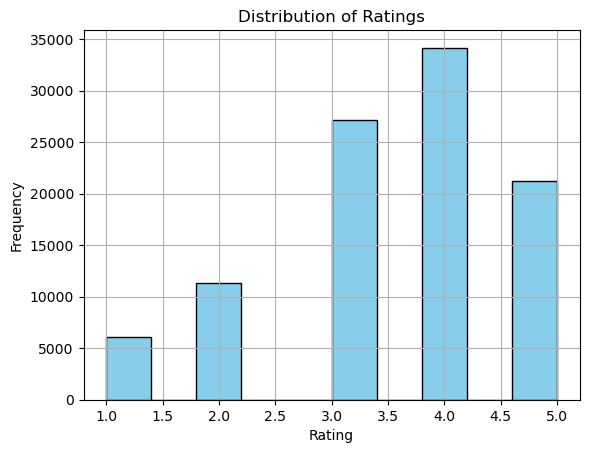

In [20]:
import matplotlib.pyplot as plt


# plots histogram for the 'rating' column
plt.hist(df_combined_sorted['rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Data Dictionary

| Field Name | Data Type | Description |
|-----------------|-----------------|-----------------|
| user_id | int | MovieLens users were selected at random for inclusion. Their ids have been anonymized. User ids are consistent between `ratings.csv` and `tags.csv` |
| movie_id | int | Only movies with at least one rating or tag are included in the dataset. These movie ids are consistent with those used on the MovieLens web site |
| rating | int | All ratings are contained in the file `ratings.csv`. Each line of this file after the header row represents one rating of one movie by one user, ratings are made on a 5-star scale, with half-star increments  |
| title | object | title of movie |
| release_date | object | date when the movie was officially released in theaters or made available for public viewing |
| Action | int | data is 1 if the genre of the movie includes action, 0 otherwise |
| Adventure | int | data is 1 if the genre of the movie includes adventure, 0 otherwise |
| Action | int | data is 1 if the genre of the movie includes action, 0 otherwise |
| Animation | int | data is 1 if the genre of the movie includes animation, 0 otherwise |
| Children | int | data is 1 if the genre of the movie includes children, 0 otherwise |
| Comedy | int | data is 1 if the genre of the movie includes comedy, 0 otherwise |
| Crime | int | data is 1 if the genre of the movie includes crime, 0 otherwise |
| Documentary | int | data is 1 if the genre of the movie includes documentary, 0 otherwise |
| Drama | int | data is 1 if the genre of the movie includes drama, 0 otherwise |
| Fantasy | int | data is 1 if the genre of the movie includes fantasy, 0 otherwise |
| Film-Noir | int | data is 1 if the genre of the movie includes film-Noir, 0 otherwise |
| Horror | int | data is 1 if the genre of the movie includes horror, 0 otherwise |
| Musical | int | data is 1 if the genre of the movie includes musical, 0 otherwise |
| Mystery | int | data is 1 if the genre of the movie includes mystery, 0 otherwise |
| Romance | int | data is 1 if the genre of the movie includes romance, 0 otherwise |
| Sci-Fi | int | data is 1 if the genre of the movie includes sci-Fi, 0 otherwise |
| Thriller | int | data is 1 if the genre of the movie includes thriller, 0 otherwise |
| War | int | data is 1 if the genre of the movie includes war, 0 otherwise |
| Mystery | int | data is 1 if the genre of the movie includes mystery, 0 otherwise |
| Western | int | data is 1 if the genre of the movie includes western, 0 otherwise |
| unknown | int | data is 1 if the genre of the movie is unknown, 0 otherwise |


In [38]:
import pandas as pd

df_combined_sorted.to_csv('data.csv', index=False) # makes csv of data

[DS-Repo](https://github.com/myusername/myproject)

# Potential UI components

- filter movies based on genre, release year or rating
- search bar to search by movie title
- slider to narrow or widen filter of release date
- allowing user to write their own review and give their own rating
- sort movies based on genre, release year or rating
- interative heatmap

# Data visualizations 

- histogram that shown the rating distribution
- line chart that shows the number of movies that release each year
- pie chart that shows the distribution of movies by genre
- heatmap that shows average ratings of movies with details such as release year and genre if hovered over(UI component as well)